# Purpose: To search databases of approved drugs for drugs associated with target genes we identified

*Import Necessary Packages*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*Genes of Interest*

*Part A: Genes from Literature*

Gene list found from:

    1. Cappella M, Ciotti C, Cohen-Tannoudji M, Biferi MG. Gene Therapy for ALS-A Perspective. Int J Mol Sci. 2019 Sep 6;20(18):4388. doi: 10.3390/ijms20184388. PMID: 31500113; PMCID: PMC6771059.
    
    2. Chia, R., Chiò, A., Traynor, B.J., 2018. Novel genes associated with amyotrophic lateral sclerosis: diagnostic and clinical implications. The Lancet Neurology 17, 94–102.. doi:10.1016/s1474-4422(17)30401-5

Part B: Associated Genes by Pubmed Occurrences (Thanks Ben Busby)

In [2]:
#Small most common genes for testing out platform
lit_gene_list = ['SOD1', 
                 'C9orf72', 
                 'MATR3', 
                 'CHCHD10', 
                 'TBK1', 
                 'TUBA4A', 
                 'NEK1', 
                 'C21orf2',
                 'CCNF']


#All genes above included in pubmed ranked search below so only used for build out purposes not final results

In [21]:
#pubmedranked genes from NEUROHACK Facilitator Ben Busby
pubmed_ranked_path = '/Users/hhelmbre/Downloads/gene_result.txt'
data = pd.read_csv(pubmed_ranked_path, sep="	")
data.head()

,tax_id,Org_name,GeneID,CurrentID,Status,Symbol,Aliases,description,other_designations,map_location,chromosome,genomic_nucleotide_accession.version,start_position_on_the_genomic_accession,end_position_on_the_genomic_accession,orientation,exon_count,OMIM,Unnamed: 17
0,9606,Homo sapiens,203228,0,live,C9orf72,"ALSFTD, DENND9, DENNL72, FTDALS, FTDALS1",C9orf72-SMCR8 complex subunit,guanine nucleotide exchange C9orf72|protein C9...,9p21.2,9,NC_000009.12,27546546.0,27573866.0,minus,12.0,614260.0,NaN
1,9606,Homo sapiens,6647,0,live,SOD1,"ALS, ALS1, HEL-S-44, IPOA, SOD, STAHP, hSod1, ...",superoxide dismutase 1,superoxide dismutase [Cu-Zn]|Cu/Zn superoxide ...,21q22.11,21,NC_000021.9,31659693.0,31668931.0,plus,5.0,147450.0,NaN
2,9606,Homo sapiens,80208,0,live,SPG11,"ALS5, CMT2X, KIAA1840","SPG11 vesicle trafficking associated, spatacsin","spatacsin|SPG11, spatacsin vesicle trafficking...",15q21.1,15,NC_000015.10,44562696.0,44663678.0,minus,41.0,610844.0,NaN
3,9606,Homo sapiens,23064,0,live,SETX,"ALS4, AOA2, SCAN2, SCAR1, Sen1, bA479K20.2",senataxin,probable helicase senataxin|SEN1 homolog|amyot...,9q34.13,9,NC_000009.12,132261356.0,132356726.0,minus,33.0,608465.0,NaN
4,9606,Homo sapiens,57679,0,live,ALS2,"ALS2CR6, ALSJ, IAHSP, PLSJ",alsin Rho guanine nucleotide exchange factor ALS2,"alsin|ALS2, alsin Rho guanine nucleotide excha...",2q33.1,2,NC_000002.12,201700267.0,201781153.0,minus,37.0,606352.0,NaN


In [22]:
lit_gene_list = data['Symbol'].tolist()
len(lit_gene_list)

504

Shortening List to top 200 for the sake of computational power

In [23]:
lit_gene_list = lit_gene_list[:200]
lit_gene_list

['C9orf72',
 'SOD1',
 'SPG11',
 'SETX',
 'ALS2',
 'LOC109504728',
 'VCP',
 'ERBB4',
 'OPTN',
 'TARDBP',
 'VEGFA',
 'FUS',
 'SQSTM1',
 'UNC13A',
 'UBQLN2',
 'TP53',
 'TBK1',
 'APOE',
 'RAPH1',
 'HNRNPA1',
 'ANG',
 'MAPT',
 'TNF',
 'CARF',
 'PFN1',
 'IL6',
 'MTHFR',
 'TRAK2',
 'SDC1',
 'MMP9',
 'APP',
 'HIF1A',
 'PARD3B',
 'HFE',
 'DISC1',
 'AR',
 'ABCB1',
 'IGF1',
 'VAPB',
 'NFKB1',
 'SNCA',
 'SIGMAR1',
 'TRPM7',
 'LIPC',
 'CYLD',
 'MAP3K7',
 'TMEM237',
 'PON1',
 'TERT',
 'DCTN1',
 'PVT1',
 'MATR3',
 'IFNG',
 'TMPRSS2',
 'PAX3',
 'C2CD6',
 'PROCR',
 'STRADB',
 'ALS3',
 'FLACC1',
 'NFE2L2',
 'NIF3L1',
 'NEFH',
 'SELL',
 'CCL2',
 'TFAP2A',
 'ALS7',
 'SIRT1',
 'MMP2',
 'CDK15',
 'NEDD4L',
 'TRPM8',
 'GSTP1',
 'MET',
 'IL17A',
 'GSK3B',
 'ALCAM',
 'PARP1',
 'NFATC2',
 'KIF5A',
 'XRCC1',
 'SMARCA2',
 'HMGB1',
 'MPP4',
 'LRRK2',
 'CASP3',
 'EFEMP1',
 'AGER',
 'NBEAL1',
 'TIAM1',
 'ABCG1',
 'NLRP3',
 'FAM117B',
 'RPS6KA1',
 'CST3',
 'IGF1R',
 'TIA1',
 'ATXN1',
 'FTO',
 'TUBA4A',
 'GRN',
 'CHCH

*Part D: Genes Identified by the team*

In [24]:
nvg_hunters_list = ['RPS6KA1', 'ABCC3', 'AXL', 'VEGFA', 'SUlT1A2', 'THRA', 'TSHR', 'MGST2', 'GRIK4', 'DYRK1A', 'PRKCB', 'ADORA1', 'IGF1R', 'TNFSF4', 'TNFSF12']
nvg_hunters_list

['RPS6KA1',
 'ABCC3',
 'AXL',
 'VEGFA',
 'SUlT1A2',
 'THRA',
 'TSHR',
 'MGST2',
 'GRIK4',
 'DYRK1A',
 'PRKCB',
 'ADORA1',
 'IGF1R',
 'TNFSF4',
 'TNFSF12']

*Search for drugs based on individual genes of interest*

In [44]:
#Add in the list from above you would like to run here:
lit_gene_list = nvg_hunters_list

#Add a filename for all saves
save_name = 'nvg_hunters_results'

In [45]:
#DrugBank

#Will expand this part of the notebook if given access to the drugbank database.  
#Even though ChemBL is working, DrugBank is of interest as 
#(1) comparison and 
#(2) because of the large number of metadata the database contains

In [46]:
#ChemBL

#Following code from ChemBL Examples: 
#https://hub.gke2.mybinder.org/user/chembl-chembl_webresource_client-x5zqvhw8/notebooks/demo_wrc.ipynb

from chembl_webresource_client.new_client import new_client

target = new_client.target

j = 0
for gene_name in lit_gene_list:
    res = target.filter(target_synonym__icontains=gene_name).only(['organism', 'pref_name', 'target_type'])
    
    for i in res:
        if j==0:
            drug_discovery_df = pd.DataFrame.from_dict(i, orient='index').T
            drug_discovery_df['gene_target'] = gene_name
        
        else:
            df2 = pd.DataFrame.from_dict(i, orient='index').T
            df2['gene_target'] = gene_name
            drug_discovery_df = drug_discovery_df.append(df2)
        
        
        j += 1

Viewing the dataframe we created

In [47]:
drug_discovery_df

,organism,pref_name,target_type,gene_target
0,Homo sapiens,Ribosomal protein S6 kinase alpha 1,SINGLE PROTEIN,RPS6KA1
0,Rattus norvegicus,Ribosomal protein S6 kinase alpha 1,SINGLE PROTEIN,RPS6KA1
0,Mus musculus,Ribosomal protein S6 kinase alpha-1,SINGLE PROTEIN,RPS6KA1
0,Homo sapiens,Ribosomal protein S6 kinase,PROTEIN FAMILY,RPS6KA1
0,Homo sapiens,Ribosomal protein S6 kinase alpha-1/alpha-3,PROTEIN FAMILY,RPS6KA1
...,...,...,...,...
0,Homo sapiens,Insulin-like growth factor I receptor,SINGLE PROTEIN,IGF1R
0,Mus musculus,Insulin-like growth factor 1 receptor,SINGLE PROTEIN,IGF1R
0,Rattus norvegicus,Insulin-like growth factor 1 receptor,SINGLE PROTEIN,IGF1R
0,Homo sapiens,Tumor necrosis factor ligand superfamily member 4,SINGLE PROTEIN,TNFSF4


In [48]:
drug_discovery_df.to_csv(str(save_name + '.csv'), index=False)

In [49]:
pref_name_frequency = pd.DataFrame(drug_discovery_df['pref_name'].value_counts()).reset_index()
pref_name_frequency = pref_name_frequency.rename(columns={"pref_name": "count", "index": "pref_name"})
pref_name_frequency['log_count'] = np.log2(pref_name_frequency['count'])
pref_name_frequency

,pref_name,count,log_count
0,Adenosine A1 receptor,7,2.807355
1,Protein kinase C beta,3,1.584963
2,Canalicular multispecific organic anion transp...,3,1.584963
3,Protein kinase C (PKC),2,1.000000
4,"3-hydroxyanthranilate 3,4-dioxygenase",2,1.000000
5,Dual-specificity tyrosine-phosphorylation regu...,2,1.000000
6,Thyroid hormone receptor alpha,2,1.000000
7,Adenosine receptors; A1 & A2,2,1.000000
8,Adenosine receptors; A1 & A3,2,1.000000
9,Ribosomal protein S6 kinase alpha 1,2,1.000000


In [50]:
plot_pref_name_frequency = pref_name_frequency.loc[pref_name_frequency['count'] > 1]

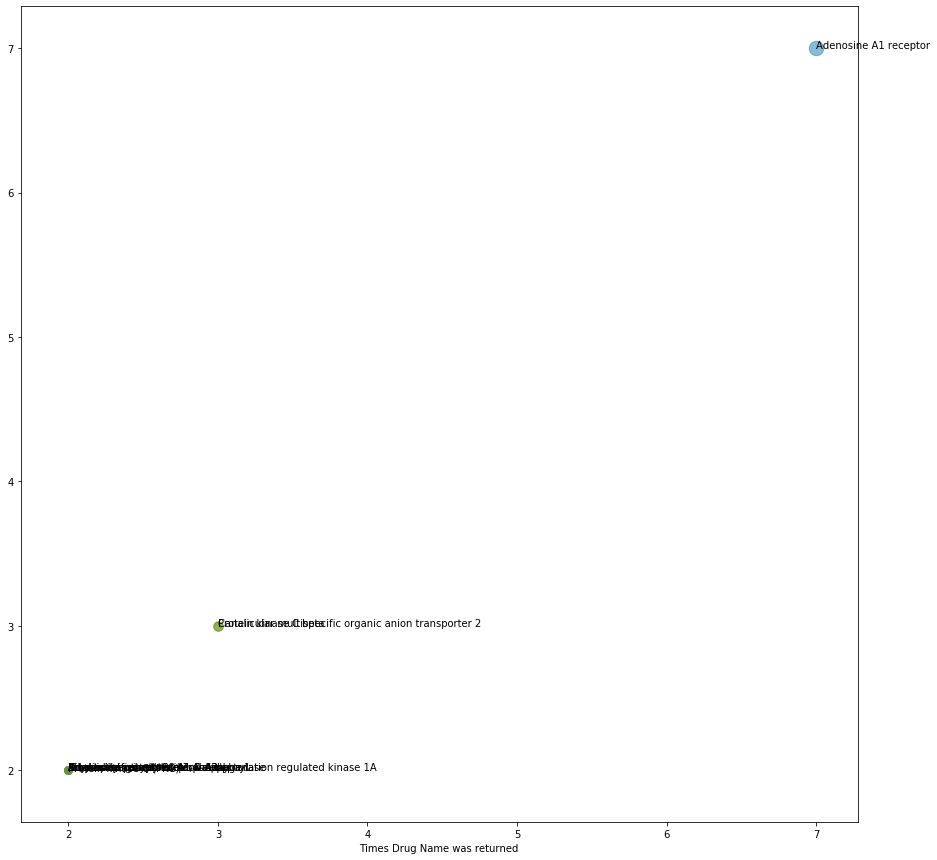

In [66]:
fig, ax = plt.subplots(facecolor='w')

for key, row in plot_pref_name_frequency.iterrows():
    ax.scatter(row['count'], row['count'], s=row['count']*30, alpha=.5)
    ax.annotate(row['pref_name'], xy=(row['count'], row['count']))

fig.set_size_inches(15, 15)
plt.xlabel('Times Drug Name was returned')
plt.savefig(str(save_name + '_pref_name_count.pdf'), dpi=150)

In [52]:
drug_target_type_freq = pd.DataFrame(drug_discovery_df['target_type'].value_counts()).reset_index()
drug_target_type_freq = drug_target_type_freq.rename(columns={"target_type": "count", "index": "target_type"})
drug_target_type_freq['log_count'] = np.log2(drug_target_type_freq['count'])
drug_target_type_freq

,target_type,count,log_count
0,SINGLE PROTEIN,44,5.459432
1,PROTEIN FAMILY,13,3.700440
2,SELECTIVITY GROUP,7,2.807355
3,PROTEIN COMPLEX,5,2.321928
4,PROTEIN COMPLEX GROUP,3,1.584963
5,CHIMERIC PROTEIN,1,0.000000


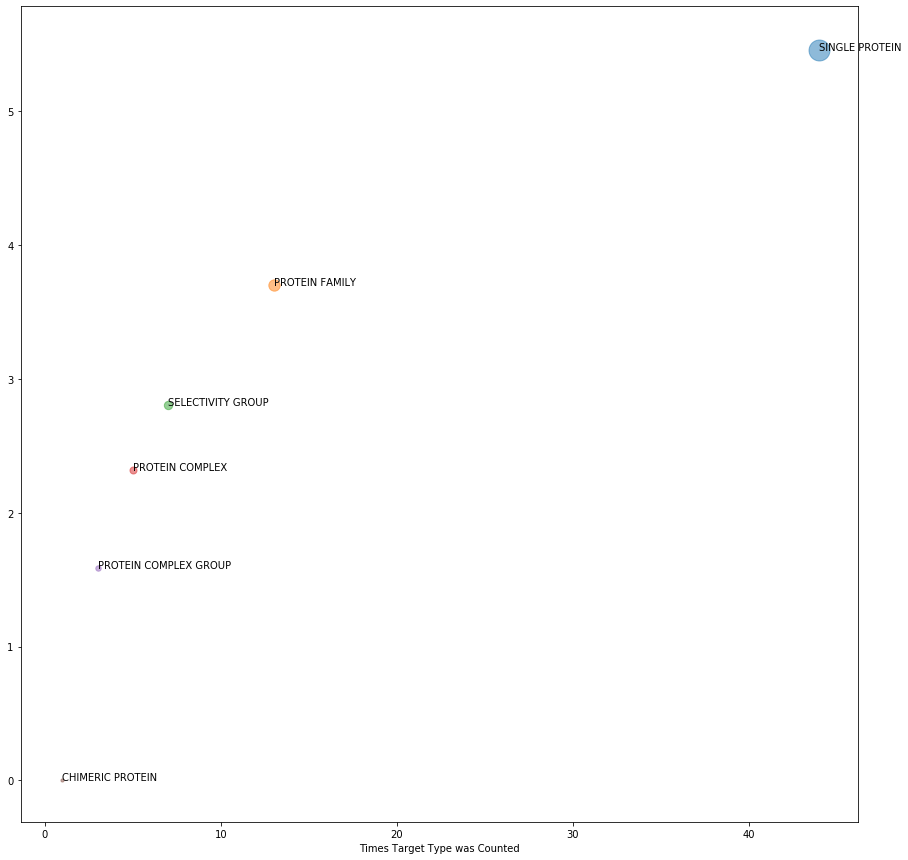

In [53]:
fig, ax = plt.subplots(facecolor='w')

for key, row in drug_target_type_freq.iterrows():
    ax.scatter(row['count'], row['log_count'], s=row['count']*10, alpha=.5)
    ax.annotate(row['target_type'], xy=(row['count'], row['log_count']))

fig.set_size_inches(15, 15)  
plt.xlabel('Times Target Type was Counted')
plt.savefig(str(save_name + '_target_name_count.pdf'), dpi=150)

In [54]:
gene_target_frequency = pd.DataFrame(drug_discovery_df['gene_target'].value_counts()).reset_index()
gene_target_frequency = gene_target_frequency.rename(columns={"gene_target": "count", "index": "gene_target"})
gene_target_frequency['log_count'] = np.log2(gene_target_frequency['count'])
gene_target_frequency

,gene_target,count,log_count
0,THRA,18,4.169925
1,ADORA1,17,4.087463
2,PRKCB,9,3.169925
3,RPS6KA1,7,2.807355
4,GRIK4,4,2.000000
5,ABCC3,3,1.584963
6,DYRK1A,3,1.584963
7,IGF1R,3,1.584963
8,AXL,2,1.000000
9,SUlT1A2,2,1.000000


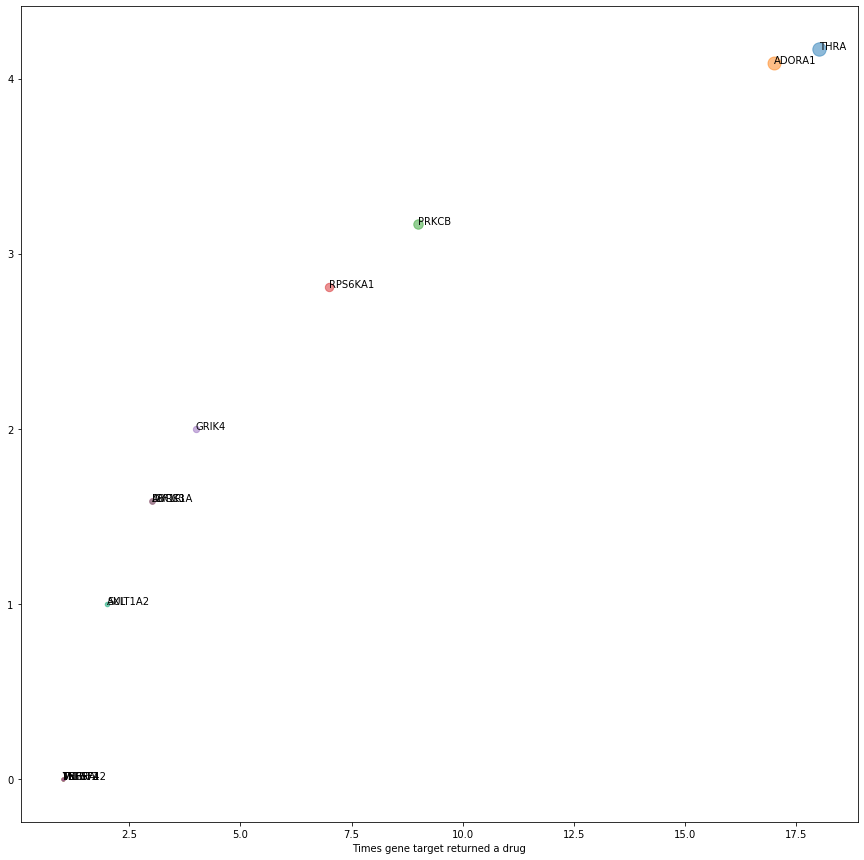

In [55]:
fig, ax = plt.subplots(facecolor='w')

for key, row in gene_target_frequency.iterrows():
    ax.scatter(row['count'], row['log_count'], s=row['count']*10, alpha=.5)
    ax.annotate(row['gene_target'], xy=(row['count'], row['log_count']))

fig.set_size_inches(15, 15)  
plt.xlabel('Times gene target returned a drug')
plt.savefig(str(save_name + '_gene_target_count.pdf'), dpi=150)

*Search for gene-drug interactions for one drug in relation to full list of genes of interest* 

In [56]:
#https://www.dgidb.org/

import urllib.request

In [60]:
gene_target_list = gene_target_frequency.loc[gene_target_frequency['count'] >= 1]
gene_target_list

,gene_target,count,log_count
0,THRA,18,4.169925
1,ADORA1,17,4.087463
2,PRKCB,9,3.169925
3,RPS6KA1,7,2.807355
4,GRIK4,4,2.000000
5,ABCC3,3,1.584963
6,DYRK1A,3,1.584963
7,IGF1R,3,1.584963
8,AXL,2,1.000000
9,SUlT1A2,2,1.000000


In [61]:
gene_target_list = gene_target_list['gene_target'].tolist()

In [62]:
m = 0
for gene in gene_target_list:
    
    if m == 0:
        dgldb_url = str('https://dgidb.org/api/v2/interactions.json?genes=' + gene)
        
    else:
        dgldb_url = str(dgldb_url + ',' + gene)
    m += 1


dgldb_url

'https://dgidb.org/api/v2/interactions.json?genes=THRA,ADORA1,PRKCB,RPS6KA1,GRIK4,ABCC3,DYRK1A,IGF1R,AXL,SUlT1A2,VEGFA,TSHR,MGST2,TNFSF4,TNFSF12'

In [63]:
import json
import requests

j = requests.get(url=dgldb_url)

# looks to be json so let's see if json will load it
content = json.loads(j.content)


In [64]:
df = pd.DataFrame.from_dict(content['matchedTerms'])
df.head()

,searchTerm,geneName,geneLongName,entrezId,geneCategories,interactions
0,THRA,THRA,"THYROID HORMONE RECEPTOR, ALPHA",7067,"[{'id': 'ecf1e11d8dcc4708a81f92bc514dafd1', 'n...",[{'interactionId': 'f4c15769-049e-420a-9e06-3e...
1,ADORA1,ADORA1,ADENOSINE A1 RECEPTOR,134,"[{'id': 'b258740aae5a4b0c8a0a82c3dcf01918', 'n...",[{'interactionId': '43bc6756-a84f-4cd8-9776-45...
2,PRKCB,PRKCB,PROTEIN KINASE C BETA,5579,"[{'id': '9bcd3de20cbc41da8d8ba4c693c93c8b', 'n...",[{'interactionId': 'b03f9d93-bbd4-4df7-8f3e-1d...
3,RPS6KA1,RPS6KA1,RIBOSOMAL PROTEIN S6 KINASE A1,6195,"[{'id': '4c14ec3171544bd2b18b2f1a45e6c8f2', 'n...",[{'interactionId': '02d6d1a6-5a44-4d4b-9417-5c...
4,GRIK4,GRIK4,GLUTAMATE IONOTROPIC RECEPTOR KAINATE TYPE SUB...,2900,"[{'id': 'b2e1d6814868498b8865b055d8972250', 'n...",[{'interactionId': 'b09c627b-c7b5-4640-9832-16...


In [65]:
df.to_csv(save_name + '_gene_interactions.csv')

## Future Build Out

*Search PubMed for researchers currently working on genes or drugs of interest*

In [ ]:
#create a paired dictionary of genes and drugs

In [ ]:
#get annotated abstracts with Pubtator

*Starting Code*

pubtator_url = 'https://www.ncbi.nlm.nih.gov/research/pubtator-api/publications/export/[Format]?[Type]=[Identifiers]&concepts=[Bioconcepts]

pubtator_url
filename = 'pub_tator_results.txt'
urllib.request.urlretrieve(pubtator_url, filename)

*System and Package Information for When Notebook was Developed*

In [124]:
import watermark

%load_ext watermark

%watermark -v -m -p numpy,pandas,scipy,skimage,matplotlib,wget

%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.8.0

numpy     : 1.21.5
pandas    : 1.3.5
scipy     : 1.3.1
skimage   : 0.17.2
matplotlib: 3.1.1
wget      : 3.2

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Last updated: Fri Jan 14 2022 07:55:40PST

